### Analisando as Vendas

In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.shape

In [ ]:
#Quantos Dados tem no total, seja na coluna mes ou coluna vendas
alucar.isna().sum().sum()

In [ ]:
alucar.dtypes

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

In [ ]:
! pip install seaborn==0.9.0
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
print(sns.__version__)

In [ ]:
sns.lineplot(x='mes',y='vendas',data=alucar)

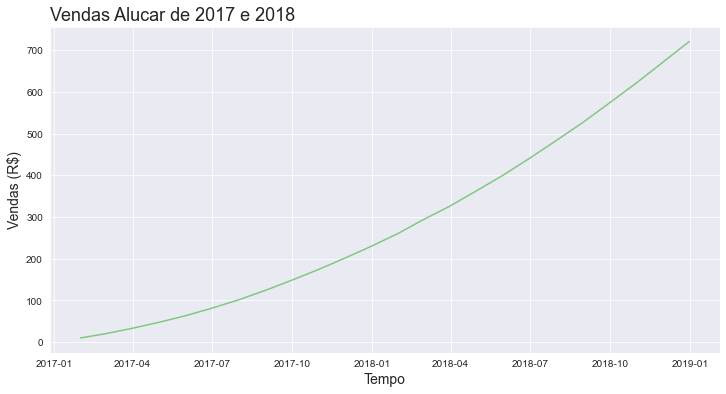

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left',fontsize = 18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax = ax